## Import Neccessary Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Creating Dataframe


In [4]:
df = pd.read_csv("DeliveryPartnerData.csv")
print(df.head(10))

                                              name online_order book_table  \
0                                            Jalsa          Yes        Yes   
1                                   Spice Elephant          Yes         No   
2                                  San Churro Cafe          Yes         No   
3                            Addhuri Udupi Bhojana           No         No   
4                                    Grand Village           No         No   
5                                  Timepass Dinner          Yes         No   
6  Rosewood International Hotel - Bar & Restaurant           No         No   
7                                           Onesta          Yes        Yes   
8                                   Penthouse Cafe          Yes         No   
9                                        Smacznego          Yes         No   

    rate  votes  approx_cost(for two people) listed_in(type)  
0  4.1/5    775                          800          Buffet  
1  4.1/5    787

## Exploratory Data Analysis (EDA)

In [5]:
## gives the row and column
print(df.shape)

## give all information about the columns present in the data
print(df.info())

(148, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB
None


In [7]:
## Changing rate from String values to float values
def changeRate(val):
  val = str(val).split('/')[0]
  return float(val)

df['rate'] = df['rate'].apply(changeRate)
print(df.head(5))
print(df.info())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148

In [10]:
## checking for null values in the data
print(df.isna().sum())

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64


#### Conclusion : There are no Null Values present in the dataframe

## Gathering Valuable Insights

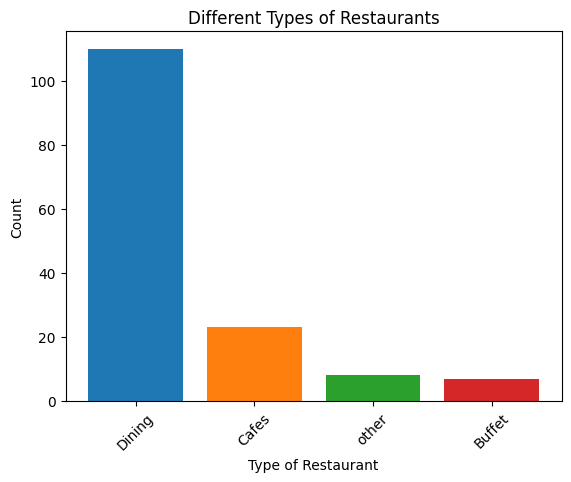

In [21]:
## Different types of restaurants
valueCounts = df['listed_in(type)'].value_counts()
colors = plt.get_cmap('tab10').colors
plt.bar(valueCounts.index, valueCounts.values,color=colors[:len(valueCounts)])
plt.xlabel('Type of Restaurant')
plt.ylabel('Count')
plt.title('Different Types of Restaurants')
plt.xticks(rotation=45)
plt.show()

#### Conclusion : The majority of the restaurants fall into Dining Category. Dining restaurants are preferred by a larger numbers of Individuals

## Grouping Types of restaurants on the basis of Votes

Text(0.5, 1.0, 'Types of restaurants on the basis of Votes')

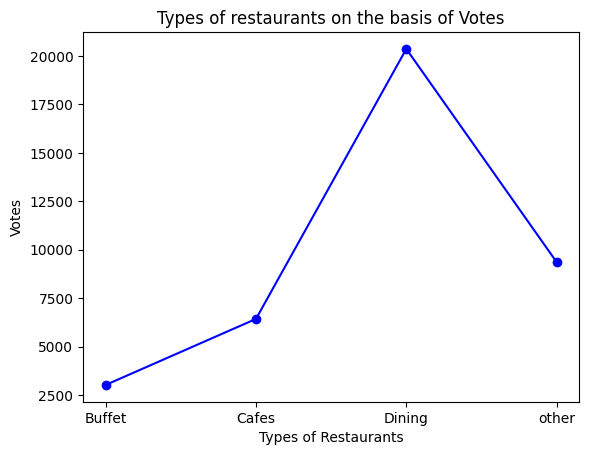

In [25]:
groupedData = df.groupby('listed_in(type)')['votes'].sum()
ans = pd.DataFrame({'votes':groupedData})
plt.plot(ans,c='blue',marker='o')
plt.xlabel("Types of Restaurants")
plt.ylabel("Votes")
plt.title("Types of restaurants on the basis of Votes")

## Distributions of Rating and Approx Price (for two people)

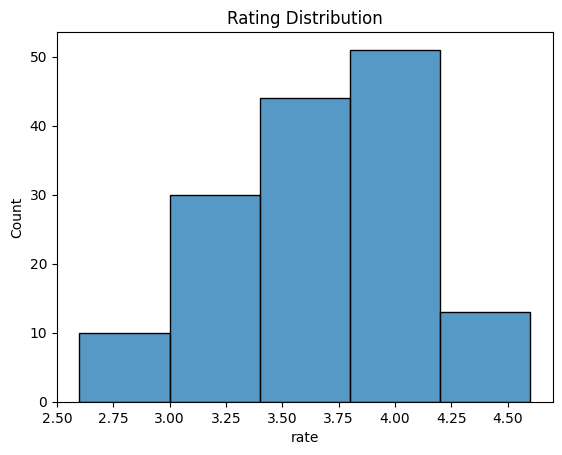

In [36]:
sns.histplot(df['rate'],bins=5)
plt.title("Rating Distribution")
plt.show()

#### Conclusion : The majority of restaurants received ratings ranging from 3.5 to 4


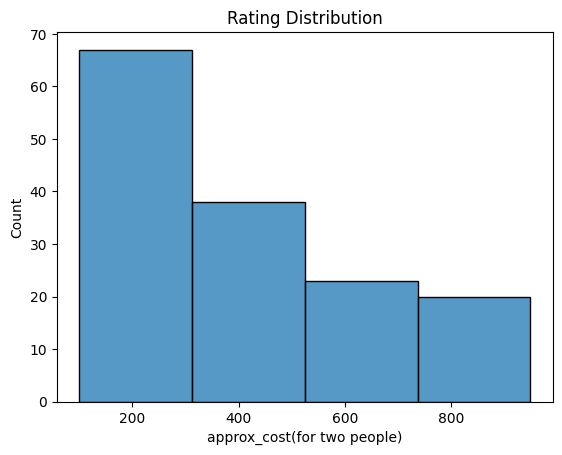

In [43]:
sns.histplot(df['approx_cost(for two people)'],bins=4)
plt.title("Rating Distribution")
plt.show()

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

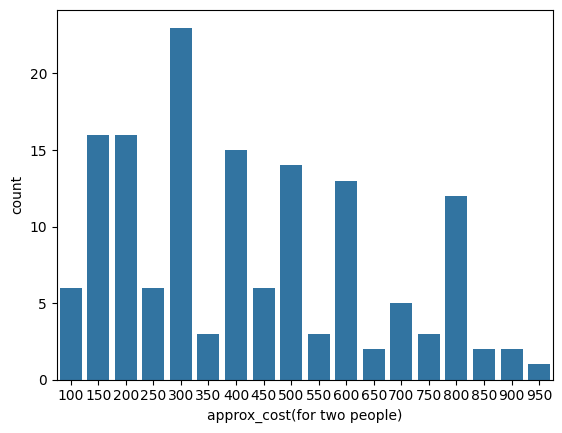

In [49]:
sns.countplot(x=df['approx_cost(for two people)'])

#### Conclusion : The majority of couples prefer restaurants with approx price upto 500 rupees

## Checking which ordering mode receives more rating

Text(0.5, 1.0, 'Boxplot of Online Orders and Rating')

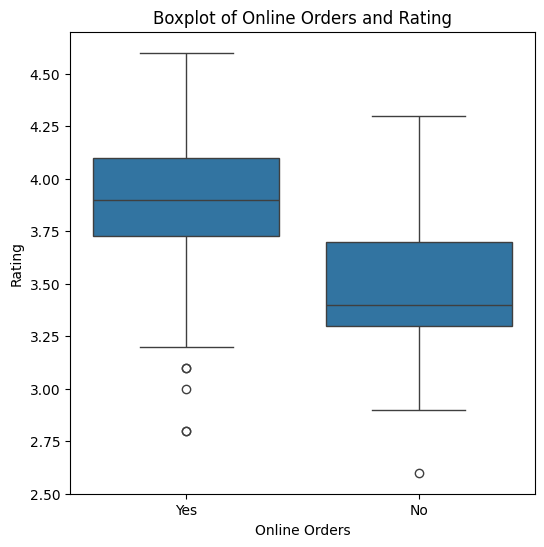

In [67]:
plt.figure(figsize=(6,6))
sns.boxplot(x='online_order', y='rate', data=df)
plt.xlabel('Online Orders')
plt.ylabel('Rating')
plt.title('Boxplot of Online Orders and Rating')

#### Conclusion : Online orders received more rating that offline order

Text(50.722222222222214, 0.5, 'Types of restaurants')

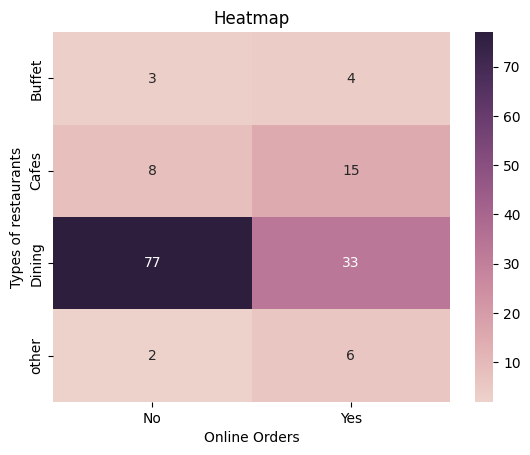

In [73]:
table = df.pivot_table(index ='listed_in(type)',columns = 'online_order',aggfunc = 'size',fill_value = 0)
sns.heatmap(table, annot=True,cmap=sns.cubehelix_palette(as_cmap=True), fmt="d")
plt.title("Heatmap")
plt.xlabel('Online Orders')
plt.ylabel('Types of restaurants')


#### Conclusion : Dining restaurants primarily accept offline orders , whereas cafes primarily receives online orders. This suggests that client prefer to place orders in person at restaurants, but prefer oline ordering at cafes.